# First notebook working with embedding vectors

This is a very outdated notebook. Was exploring how to align the embedding vectors and the ephys data here.


In [1]:
%load_ext autoreload
%autoreload 2
import os, sys,pickle

import matplotlib.pyplot as plt
import numpy as np
sys.path.append(os.path.abspath('..'))

from VideoAnalysisUtils import preprocessing_utils as utils
from VideoAnalysisUtils import preprocessing_DJ_2022Aug as preprocessing

In [2]:
import os

def get_file_paths(directory):
    """
    Get a list of full file paths in a given directory.

    Parameters:
    directory : str
        The path to the directory.

    Returns:
    list
        List of full file paths.
    """
    directory = os.path.abspath(directory)
    file_paths = []
    for filename in os.listdir(directory):
        full_path = os.path.join(directory, filename)
        if os.path.isfile(full_path):
            file_paths.append(full_path)
    return file_paths

# Replace these with the correct paths to your directories
embed_dir = 'embed'
ephys_dir = 'ephys'
goodunits_dir = 'goodunits'

embed_files = get_file_paths(embed_dir)
ephys_files = get_file_paths(ephys_dir)
goodunits_files = get_file_paths(goodunits_dir)

# Now you have three lists with the full paths
print("Embed Files:", embed_files)
print("Ephys Files:", ephys_files)
print("GoodUnits Files:", goodunits_files)


Embed Files: ['/home/kurgyis/STANFORD/Druckmann/VideoAnalysis/CodeForGeneratingR2/embed/SC026_20190805_21.pickle']
Ephys Files: ['/home/kurgyis/STANFORD/Druckmann/VideoAnalysis/CodeForGeneratingR2/ephys/map-export_SC026_20190805_152117_s21_p4.mat', '/home/kurgyis/STANFORD/Druckmann/VideoAnalysis/CodeForGeneratingR2/ephys/map-export_SC026_20190805_152117_s21_p3.mat', '/home/kurgyis/STANFORD/Druckmann/VideoAnalysis/CodeForGeneratingR2/ephys/map-export_SC026_20190805_152117_s21_p1.mat', '/home/kurgyis/STANFORD/Druckmann/VideoAnalysis/CodeForGeneratingR2/ephys/map-export_SC026_20190805_152117_s21_p2.mat', '/home/kurgyis/STANFORD/Druckmann/VideoAnalysis/CodeForGeneratingR2/ephys/map-export_SC030_20191004_143720_s34_p1.mat']
GoodUnits Files: ['/home/kurgyis/STANFORD/Druckmann/VideoAnalysis/CodeForGeneratingR2/goodunits/SC026_20190805_152117_GoodUnitsIdx_14regions_cl.mat']


In [3]:
with open(embed_files[0], 'rb') as file:
    embed_data = pickle.load(file)

for k,v in embed_data.items():
    if type(v) == np.ndarray:
        print(k, v.shape)


time (248,)
trial_id (375,)
embed (248, 375, 16)
lick (375,)


In [4]:
unique_sessions = np.unique([os.path.basename(f).split('_p')[0] for f in ephys_files])
unique_sessions
session_name = unique_sessions[0].split('_')[1] + '_' + unique_sessions[0].split('_')[2] + '_' + unique_sessions[0].split('_')[4][1:]
session_name

'SC026_20190805_21'

In [5]:
embed_data['time']

array([-2.9988, -2.9818, -2.9648, -2.9478, -2.9308, -2.9138, -2.8968,
       -2.8798, -2.8628, -2.8458, -2.8288, -2.8118, -2.7948, -2.7778,
       -2.7608, -2.7438, -2.7268, -2.7098, -2.6928, -2.6758, -2.6588,
       -2.6418, -2.6248, -2.6078, -2.5908, -2.5738, -2.5568, -2.5398,
       -2.5228, -2.5058, -2.4888, -2.4718, -2.4548, -2.4378, -2.4208,
       -2.4038, -2.3868, -2.3698, -2.3528, -2.3358, -2.3188, -2.3018,
       -2.2848, -2.2678, -2.2508, -2.2338, -2.2168, -2.1998, -2.1828,
       -2.1658, -2.1488, -2.1318, -2.1148, -2.0978, -2.0808, -2.0638,
       -2.0468, -2.0298, -2.0128, -1.9958, -1.9788, -1.9618, -1.9448,
       -1.9278, -1.9108, -1.8938, -1.8768, -1.8598, -1.8428, -1.8258,
       -1.8088, -1.7918, -1.7748, -1.7578, -1.7408, -1.7238, -1.7068,
       -1.6898, -1.6728, -1.6558, -1.6388, -1.6218, -1.6048, -1.5878,
       -1.5708, -1.5538, -1.5368, -1.5198, -1.5028, -1.4858, -1.4688,
       -1.4518, -1.4348, -1.4178, -1.4008, -1.3838, -1.3668, -1.3498,
       -1.3328, -1.3

In [6]:
embed_data['trial_id']

array([ 11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,
        24,  25,  26,  27,  28,  29,  30,  31,  32,  34,  35,  37,  38,
        39,  42,  43,  45,  46,  47,  49,  50,  52,  54,  55,  56,  57,
        59,  60,  61,  62,  67,  68,  69,  70,  71,  72,  73,  75,  76,
        77,  78,  79,  81,  83,  85,  86,  88,  89,  90,  91,  92,  93,
        95,  96,  99, 100, 101, 102, 103, 104, 105, 108, 109, 110, 111,
       114, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 128, 129,
       132, 133, 134, 137, 139, 140, 141, 142, 145, 147, 148, 149, 151,
       152, 153, 155, 157, 159, 160, 161, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 174, 176, 180, 181, 186, 187, 188, 189, 190,
       191, 194, 195, 198, 199, 202, 203, 204, 205, 206, 213, 214, 216,
       221, 222, 223, 224, 226, 227, 228, 230, 231, 234, 236, 237, 238,
       242, 243, 244, 246, 248, 249, 250, 251, 252, 254, 256, 257, 258,
       265, 267, 268, 270, 271, 272, 273, 274, 275, 276, 277, 27

In [8]:
ephys_raw = utils.loadmat(ephys_files[-1])

In [9]:
ephys_raw['tracking']['camera_0_side'].keys()

dict_keys(['fs', 'Nframes', 'trialNum', 'nose_x', 'nose_y', 'nose_likelihood', 'tongue_x', 'tongue_y', 'tongue_likelihood', 'jaw_x', 'jaw_y', 'jaw_likelihood'])

In [10]:
marker_keys = ['nose_x', 'nose_y', 'tongue_x', 'tongue_y', 'jaw_x', 'jaw_y', 'whisker_x', 'whisker_y']

In [37]:
ephys_raw['tracking']['camera_0_side']['trialNum']

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [38]:
ephys_raw['tracking']['camera_0_side']['Nframes'][0]

[56.846365451812744,
 56.50339889526367,
 56.58842992782593,
 56.48216438293457,
 56.736032485961914,
 56.405582904815674,
 56.4729266166687,
 56.53425598144531,
 56.34405851364136,
 56.31008720397949,
 56.44659233093262,
 56.43270683288574,
 56.49789381027222,
 56.41393995285034,
 56.425052642822266,
 56.33576202392578,
 56.23823595046997,
 56.29508066177368,
 56.20345401763916,
 56.23006057739258,
 56.186477184295654,
 56.04424715042114,
 55.97453451156616,
 56.2181077003479,
 56.03516483306885,
 55.97872543334961,
 55.75550937652588,
 55.89341640472412,
 55.5884313583374,
 55.570364475250244,
 55.59830927848816,
 55.764957666397095,
 56.024330139160156,
 56.2515983581543,
 56.26054859161377,
 56.57756757736206,
 56.19815921783447,
 56.5200457572937,
 57.129547119140625,
 57.290024757385254,
 57.28729963302612,
 57.70851135253906,
 57.86414051055908,
 57.98606252670288,
 57.93307018280029,
 58.30396914482117,
 58.04121160507202,
 58.10317659378052,
 58.41344356536865,
 58.63958597183

In [39]:
marker_data = {}
for k in ephys_raw['tracking']['camera_0_side']['trialNum']:
    marker_data[k] = np.zeros((len(marker_keys),len(ephys_raw['tracking']['camera_0_side']['Nframes'][k-1])))
    for imarker,mk in enumerate(marker_keys):
        marker_data[k][imarker] = ephys_raw['tracking']['camera_0_side'][mk][k-1]

In [40]:
go_times = ephys_raw['task_cue_time'][0,:]
end_times = ephys_raw['trial_end_time'][0,:]

n_frames = np.array([marker_data[k].shape[1] for k in marker_data.keys()])
trial_inds = [int(k) for k in marker_data.keys()]
dt = 0.0034
t_min = -3
t_max = 1.5

# get the indices of the frames that are within the time limits
tt = np.arange(t_min, t_max, dt)
marker_vecs = np.zeros((len(tt), len(trial_inds), marker_data[trial_inds[0]].shape[0]))
for trial in range(len(trial_inds)):
    _this_embed_array = marker_data[trial_inds[trial]]
    times_for_frames = np.arange(0,n_frames[trial],1) * dt - go_times[np.array(trial_inds) -1][trial]
    for i, t in enumerate(tt):
        t_start = t - dt
        t_end = t

        # Find the indices of embeddings within the time range [t_start, t_end)
        mask = np.logical_and(times_for_frames >= t_start, times_for_frames < t_end)

        if np.any(mask):
            # Use the embedding at the last time point within the time range
            marker_vecs[i, trial, :] = _this_embed_array[:,np.where(mask)[0][-1]]
        
#sort trials
sort_inds = np.argsort(trial_inds)
marker_vecs[:,sort_inds,:], tt, np.array(trial_inds)[sort_inds]

(array([[[ 58.09761286, 157.21472931, 229.74275315, ..., 226.47564745,
          115.52458715, 140.27893829],
         [ 59.68395901, 150.42074013, 230.01094151, ..., 224.27731466,
          110.59959888, 139.10648537],
         [ 57.75938702, 162.71974087, 230.00920725, ..., 232.29636574,
          113.72978735, 141.41506577],
         ...,
         [ 56.85183477, 168.43466949, 196.75830233, ..., 227.13323307,
          117.08257687, 140.65240955],
         [ 57.86022854, 166.76296711,  45.92402136, ..., 230.78686714,
          116.52265167, 141.26202393],
         [ 57.30418634, 170.82458353,  52.70389986, ..., 228.46481895,
          115.81599188, 141.0004282 ]],
 
        [[ 58.03415442, 157.00518799, 229.87011147, ..., 226.39426041,
          115.87721205, 140.01270294],
         [ 59.93176677, 150.46794891, 230.02577758, ..., 225.61891699,
          112.33030844, 139.05915451],
         [ 57.95471525, 162.89879131, 312.69096971, ..., 232.32563114,
          113.71432161, 141.3681

In [41]:
def align_markers_between_lims(marker_data, go_times, t_min = -3, t_max = 1.5):
    n_frames = np.array([marker_data[k].shape[1] for k in marker_data.keys()])
    trial_inds = [int(k) for k in marker_data.keys()]
    dt = 0.0034

    # get the indices of the frames that are within the time limits
    tt = np.arange(t_min, t_max, dt)
    marker_vecs = np.zeros((len(tt), len(trial_inds), marker_data[trial_inds[0]].shape[0]))
    for trial in range(len(trial_inds)):
        _this_embed_array = marker_data[trial_inds[trial]]
        times_for_frames = np.arange(0,n_frames[trial],1) * dt - go_times[np.array(trial_inds) -1][trial]
        for i, t in enumerate(tt):
            t_start = t - dt
            t_end = t

            # Find the indices of embeddings within the time range [t_start, t_end)
            mask = np.logical_and(times_for_frames >= t_start, times_for_frames < t_end)

            if np.any(mask):
                # Use the embedding at the last time point within the time range
                marker_vecs[i, trial, :] = _this_embed_array[:,np.where(mask)[0][-1]]
            
    #sort trials
    sort_inds = np.argsort(trial_inds)
    marker_vecs[:,sort_inds,:], tt, np.array(trial_inds)[sort_inds]

In [42]:
_ = align_markers_between_lims(marker_data, go_times, t_min = -3, t_max = 1.5)

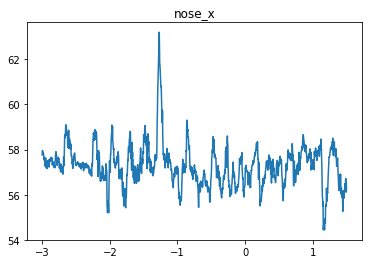

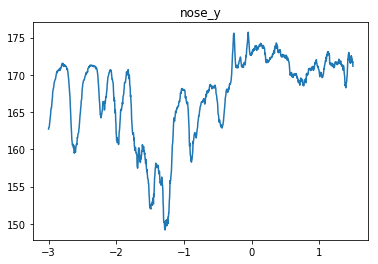

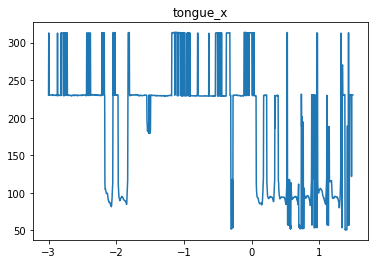

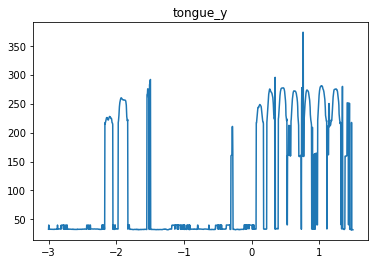

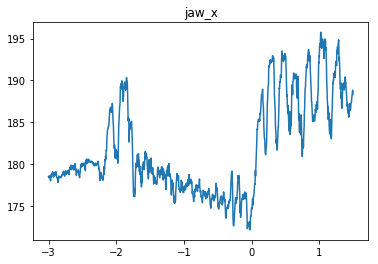

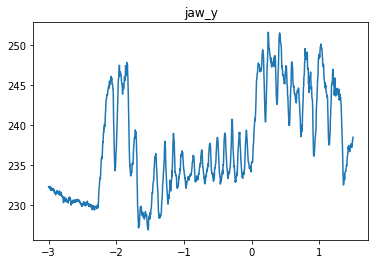

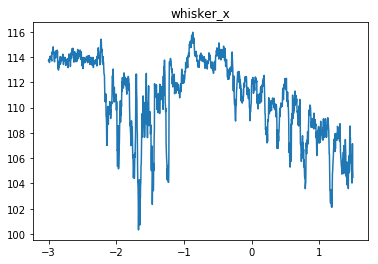

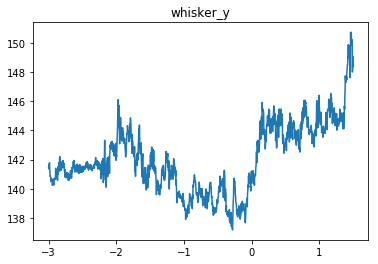

In [29]:
for i,mk in enumerate(marker_keys):
    plt.figure()
    plt.title(mk)
    plt.plot(tt,embed_vecs[:,2,i])
    plt.show()
    plt.close()

In [22]:
marker_data[1].shape

(8, 1692)

In [13]:
len(ephys_raw['tracking']['camera_0_side']['nose_x'])

561

In [11]:
len(ephys_raw['tracking']['camera_0_side']['nose_x'][3])

1711

In [21]:
ephys_raw['tracking']['camera_0_side']['fs']

294.1176

In [12]:
len(ephys_raw['tracking']['camera_0_side']['Nframes'])

561

In [13]:
len(ephys_raw['tracking']['camera_0_side']['Nframes'][0])

1692

In [31]:
ephys_raw['tracking']['camera_0_side']['Nframes'][0]

[56.846365451812744,
 56.50339889526367,
 56.58842992782593,
 56.48216438293457,
 56.736032485961914,
 56.405582904815674,
 56.4729266166687,
 56.53425598144531,
 56.34405851364136,
 56.31008720397949,
 56.44659233093262,
 56.43270683288574,
 56.49789381027222,
 56.41393995285034,
 56.425052642822266,
 56.33576202392578,
 56.23823595046997,
 56.29508066177368,
 56.20345401763916,
 56.23006057739258,
 56.186477184295654,
 56.04424715042114,
 55.97453451156616,
 56.2181077003479,
 56.03516483306885,
 55.97872543334961,
 55.75550937652588,
 55.89341640472412,
 55.5884313583374,
 55.570364475250244,
 55.59830927848816,
 55.764957666397095,
 56.024330139160156,
 56.2515983581543,
 56.26054859161377,
 56.57756757736206,
 56.19815921783447,
 56.5200457572937,
 57.129547119140625,
 57.290024757385254,
 57.28729963302612,
 57.70851135253906,
 57.86414051055908,
 57.98606252670288,
 57.93307018280029,
 58.30396914482117,
 58.04121160507202,
 58.10317659378052,
 58.41344356536865,
 58.63958597183

In [32]:
0.0034 * 1692

5.7528

In [28]:
ephys_raw['task_cue_time']

array([[3.2469, 3.0695, 3.7171, ..., 3.1966, 3.2319, 3.0559],
       [1.5   , 1.5   , 1.5   , ..., 1.5   , 1.5   , 1.5   ]])

In [20]:
ephys_raw['tracking']['camera_0_side']['trialNum']

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [266]:
# laod pickle
with open('SC026_20190805.pkl', 'rb') as file:


    all_embed_one_sess = pickle.load(file)

In [225]:
len(all_embed_one_sess.keys())

503

In [249]:
# laod pickle
with open('SC026_20190805.pkl', 'rb') as file:
    _all_embed_one_sess = pickle.load(file)
len(_all_embed_one_sess.keys())

0

In [226]:
for k in all_embed_one_sess.keys():
    if len(k) > 3:
        print(k)

In [227]:
trial_inds = [int(k) for k in all_embed_one_sess.keys()]

In [228]:
all_embed_one_sess['1'].shape

(1692, 4)

In [229]:
ephys_raw['task_cue_time'].shape

(2, 561)

In [230]:
print(ephys_raw['trial_end_time'].shape)
print(ephys_raw['task_sample_time'][:10])

(2, 561)
[[1.3969 1.2195 1.8671 ... 1.3466 1.3819 1.2059]
 [0.65   0.65   0.65   ... 0.65   0.65   0.65  ]]


In [231]:
go_times = ephys_raw['task_cue_time'][0,:]
end_times = ephys_raw['trial_end_time'][0,:]

1.0


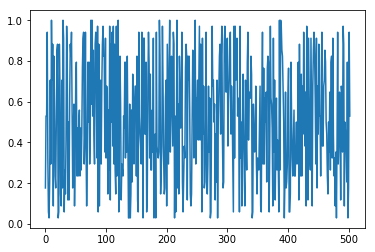

In [242]:
n_frames = np.array([all_embed_one_sess[k].shape[0] for k in all_embed_one_sess.keys()])

plt.plot(n_frames - end_times[np.array(trial_inds) -1]/0.0034)
print(max(n_frames - end_times[np.array(trial_inds) -1]/0.0034))

In [233]:
dt = 0.0034
times_per_frames = [[(i - int( go_times[np.array(trial_inds) -1][trial] / dt)) * dt for i in range(n_frames[trial])] for trial in range(len(n_frames))]

In [239]:
((n_frames - end_times[np.array(trial_inds) -1]/0.0034 < 1)*(n_frames - end_times[np.array(trial_inds) -1]/0.0034)>0)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [240]:
(n_frames - end_times[np.array(trial_inds) -1]/0.0034)[(n_frames - end_times[np.array(trial_inds) -1]/0.0034 <= 1)*(n_frames - end_times[np.array(trial_inds) -1]/0.0034>=0) == False]

array([], dtype=float64)

In [101]:
times_per_frames[0]

[-3.2163999999999997,
 -3.2129999999999996,
 -3.2096,
 -3.2062,
 -3.2028,
 -3.1994,
 -3.1959999999999997,
 -3.1925999999999997,
 -3.1892,
 -3.1858,
 -3.1824,
 -3.179,
 -3.1755999999999998,
 -3.1721999999999997,
 -3.1687999999999996,
 -3.1654,
 -3.162,
 -3.1586,
 -3.1552,
 -3.1517999999999997,
 -3.1483999999999996,
 -3.145,
 -3.1416,
 -3.1382,
 -3.1348,
 -3.1313999999999997,
 -3.1279999999999997,
 -3.1246,
 -3.1212,
 -3.1178,
 -3.1144,
 -3.1109999999999998,
 -3.1075999999999997,
 -3.1041999999999996,
 -3.1008,
 -3.0974,
 -3.094,
 -3.0906,
 -3.0871999999999997,
 -3.0837999999999997,
 -3.0804,
 -3.077,
 -3.0736,
 -3.0702,
 -3.0667999999999997,
 -3.0633999999999997,
 -3.0599999999999996,
 -3.0566,
 -3.0532,
 -3.0498,
 -3.0463999999999998,
 -3.0429999999999997,
 -3.0395999999999996,
 -3.0362,
 -3.0328,
 -3.0294,
 -3.026,
 -3.0225999999999997,
 -3.0191999999999997,
 -3.0158,
 -3.0124,
 -3.009,
 -3.0056,
 -3.0021999999999998,
 -2.9987999999999997,
 -2.9953999999999996,
 -2.992,
 -2.9886,
 -2.

In [212]:
def align_embedding_vecs_between_lims(all_embed_one_sess, go_times, t_min = -3, t_max = 1.5):
    n_frames = np.array([all_embed_one_sess[k].shape[0] for k in all_embed_one_sess.keys()])
    trial_inds = [int(k) for k in all_embed_one_sess.keys()]
    dt = 0.0034

    # get the indices of the frames that are within the time limits
    tt = np.arange(t_min, t_max, dt)
    embed_vecs = np.zeros((len(tt), len(trial_inds), all_embed_one_sess[str(trial_inds[0])].shape[1]))
    for trial in range(len(trial_inds)):
        _this_embed_array = all_embed_one_sess[str(trial_inds[trial])]
        times_for_frames = np.arange(0,n_frames[trial],1) * dt - go_times[np.array(trial_inds) -1][trial]
        for i, t in enumerate(tt):
            t_start = t - dt
            t_end = t

            # Find the indices of embeddings within the time range [t_start, t_end)
            mask = np.logical_and(times_for_frames >= t_start, times_for_frames < t_end)

            if np.any(mask):
                # Use the embedding at the last time point within the time range
                embed_vecs[i, trial, :] = _this_embed_array[np.where(mask)[0][-1], :]
            
    #sort trials
    sort_inds = np.argsort(trial_inds)
    return embed_vecs[:,sort_inds,:], tt, np.array(trial_inds)[sort_inds]

In [213]:
tt = np.arange(-3, 1.5, dt)
tt % 0.0034

array([0.0022, 0.0022, 0.0022, ..., 0.0022, 0.0022, 0.0022])

In [245]:
def get_bad_trial_inds(all_embed_one_sess, end_times, dt = 0.0034):
    trial_inds = [int(k) for k in all_embed_one_sess.keys()]
    n_frames = np.array([all_embed_one_sess[k].shape[0] for k in all_embed_one_sess.keys()])
    time_diff_array = (n_frames - end_times[np.array(trial_inds) -1]/dt)
    bad_trials = np.array(trial_inds)[np.logical_or(time_diff_array < 0, time_diff_array > 1)]
    return bad_trials

In [248]:
ephys_data_folder = '/oak/stanford/groups/shauld/kurgyis/data/Map_ULTIMATE_export/MAP_dandi/'
embedding_data_folder = '/oak/stanford/groups/shauld/kurgyis/data/Map_embed_vecs/'
aligned_embed_data_folder = '/oak/stanford/groups/shauld/kurgyis/data/Map_aligned_embed_vecs/'

embed_files = get_file_paths(embedding_data_folder)
ephys_files = get_file_paths(ephys_data_folder)

for i, embed_fname in enumerate(embed_files):
    print(i, embed_fname)
    with open(embed_fname, 'rb') as file:
        all_embed_one_sess = pickle.load(file)

    session_string = embed_fname[:-4].split('/')[-1]
    session_ephys_files = [f for f in ephys_files if session_string in f]
    print('Loading raw ephys from %s', session_ephys_files[0])
    ephys_raw = utils.loadmat(session_ephys_files[0])

    go_times = ephys_raw['task_cue_time'][0,:]
    end_times = ephys_raw['trial_end_time'][0,:]

    bad_trials = get_bad_trial_inds(all_embed_one_sess, end_times)

    # bad trials
    if len(bad_trials) > 0:
        print('bad trials: ', bad_trials)
        for k in bad_trials:
            all_embed_one_sess.pop(str(k), None)

    # process the embed data
            
    embed_aligned, tt, trial_inds = align_embedding_vecs_between_lims(all_embed_one_sess, go_times, t_min = -3, t_max = 1.5)

    dict_to_save = {'embed': embed_aligned, 'embed_time': tt, 'trial_inds': trial_inds}

    filename = aligned_embed_data_folder + session_string + '_aligned_embed'

    with open(filename + '.pkl', 'wb') as file:
        pickle.dump(dict_to_save, file)


In [214]:
embed_aligned, tt, trial_inds = align_embedding_vecs_between_lims(all_embed_one_sess, go_times, t_min = -3, t_max = 1.5)

In [215]:
embed_aligned.shape

(1324, 503, 4)

In [216]:
tt.shape

(1324,)

In [217]:
trial_inds

array([  1,   2,   6,   8,  10,  12,  13,  14,  15,  16,  17,  18,  19,
        20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  42,  43,  44,  45,  46,
        47,  48,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,
        61,  62,  63,  64,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 175, 176, 177, 178, 179, 181, 182, 183, 186,
       187, 188, 189, 190, 191, 192, 193, 195, 196, 197, 198, 19

In [74]:
for k in all_embed_one_sess.keys():
    if all_embed_one_sess[k].shape[0] != len(ephys_raw['tracking']['camera_0_side']['Nframes'][int(k)-1]):
        print(k, all_embed_one_sess[k].shape[0], len(ephys_raw['tracking']['camera_0_side']['Nframes'][int(k)-1]))

In [44]:
preprocessing.process_one_sess('./',ephys_files, 0.04, 0.017, -3,1.2,'ephys/preprocessed/')

classifier
./goodunits
Reading probe file 1
Reading probe file 2
Reading probe file 3
Reading probe file 4
Filtered neurons: left_ALM 52
Filtered neurons: right_ALM 18
Filtered neurons: right_Midbrain 43
Filtered neurons: left_Thalamus 139
Filtered neurons: right_Pons 9
Filtered neurons: left_Hypothalamus 2
Filtered neurons: left_Hippocampus 17
Filtered neurons: left_Orbital 84
Filtered neurons: right_Orbital 40
Filtered neurons: left_OtherCortex 5
Filtered neurons: right_OtherCortex 20
Filtered neurons: left_Olfactory 69
Filtered neurons: right_Olfactory 14


In [3]:
preprocessed = get_file_paths('ephys/preprocessed/stride17_bw40/SC026_20190805_21/')
preprocessed

['/home/kurgyis/STANFORD/Druckmann/VideoAnalysis/CodeForGeneratingR2/ephys/preprocessed/stride17_bw40/SC026_20190805_21/5_right_Pons.pickle',
 '/home/kurgyis/STANFORD/Druckmann/VideoAnalysis/CodeForGeneratingR2/ephys/preprocessed/stride17_bw40/SC026_20190805_21/11_right_OtherCortex.pickle',
 '/home/kurgyis/STANFORD/Druckmann/VideoAnalysis/CodeForGeneratingR2/ephys/preprocessed/stride17_bw40/SC026_20190805_21/others_finished.txt',
 '/home/kurgyis/STANFORD/Druckmann/VideoAnalysis/CodeForGeneratingR2/ephys/preprocessed/stride17_bw40/SC026_20190805_21/4_left_Thalamus.pickle',
 '/home/kurgyis/STANFORD/Druckmann/VideoAnalysis/CodeForGeneratingR2/ephys/preprocessed/stride17_bw40/SC026_20190805_21/6_left_Hypothalamus.pickle',
 '/home/kurgyis/STANFORD/Druckmann/VideoAnalysis/CodeForGeneratingR2/ephys/preprocessed/stride17_bw40/SC026_20190805_21/9_right_Orbital.pickle',
 '/home/kurgyis/STANFORD/Druckmann/VideoAnalysis/CodeForGeneratingR2/ephys/preprocessed/stride17_bw40/SC026_20190805_21/12_left

In [4]:
fr_list = []
ccf_labels = []
ccf_coord_list = []
for file in preprocessed:
    if file[-6:] != 'pickle':
        continue
    with open(file, 'rb') as f:
        ephys_data = pickle.load(f)
    fr_list.append(ephys_data['fr'])
    ccf_labels += ephys_data['ccf_label']
    ccf_coord_list.append(ephys_data['ccf_coordinate'])
    print(ephys_data.keys())

ccf_coords = np.concatenate(ccf_coord_list, axis = 0)
fr = np.concatenate(fr_list, axis=2)

dict_keys(['sess_name', 'area', 'bin_centers', 'fr', 'spike_times', 'neuron_info', 'unit_qc', 'ccf_coordinate', 'ccf_label', 'ccf_unit_id', 'auto_learn_trials', 'early_lick_trials', 'auto_water_trials', 'free_water_trials', 'lick_directions', 'lick_times', 'gocue_time', 'correctness', 'delay_period', 'sample_period', 'stimulation', 'trial_type'])
dict_keys(['sess_name', 'area', 'bin_centers', 'fr', 'spike_times', 'neuron_info', 'unit_qc', 'ccf_coordinate', 'ccf_label', 'ccf_unit_id', 'auto_learn_trials', 'early_lick_trials', 'auto_water_trials', 'free_water_trials', 'lick_directions', 'lick_times', 'gocue_time', 'correctness', 'delay_period', 'sample_period', 'stimulation', 'trial_type'])
dict_keys(['sess_name', 'area', 'bin_centers', 'fr', 'spike_times', 'neuron_info', 'unit_qc', 'ccf_coordinate', 'ccf_label', 'ccf_unit_id', 'auto_learn_trials', 'early_lick_trials', 'auto_water_trials', 'free_water_trials', 'lick_directions', 'lick_times', 'gocue_time', 'correctness', 'delay_period', 

In [5]:
ephys_data['ccf_unit_id']

[409, 417, 503, 504, 505]

In [302]:
ephys_data['correctness']

array([ 0,  1,  1,  0,  1,  1,  1,  1,  0, -1,  1,  1,  1,  1,  1,  1,  0,
        0,  0,  0,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  0,  1,  1,  0,  1,  1,  0,  0,  0,  1,  0,  0,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  0,  1,  1,
        1,  1,  1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,
        1,  1,  1,  1,  1,  0,  0,  1,  0,  1,  1,  1,  0,  0,  1,  1,  1,
        1,  1,  0,  1,  0,  1,  1,  0,  1,  1,  0, -1,  1,  1,  1,  1,  1,
        1,  0,  1,  1,  1,  1,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  0,  1,  1,  0,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,
        1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,
        0,  1,  0,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  0,  1,  1,  0,  0,  1,  1,
        1,  0,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  0,  1,  0,  1,
        1,  1,  1,  1,  1

In [305]:
ephys_data['trial_type']

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,

In [304]:
def get_regular_trial_mask(ephys_data):
    return (ephys_data['early_lick_trials'] == 0) * (ephys_data['auto_water_trials'] == 0) * (ephys_data['free_water_trials'] == 0) * (ephys_data['correctness'] != -1)

In [262]:
ccf_coords = np.concatenate(ccf_coord_list, axis = 0)
fr = np.concatenate(fr_list, axis=2)

print(ccf_coords.shape)
print(fr.shape)
print(len(ccf_labels))

(512, 3)
(248, 561, 512)
512


In [47]:
ephys_data['sample_period']

array([0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65,
       0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65,
       0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65,
       0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65,
       0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65,
       0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65,
       0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65,
       0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65,
       0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65,
       0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65,
       0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65,
       0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65,
       0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65,
       0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.

In [48]:
fr = np.concatenate(fr_list, axis=2)
tt = ephys_data['bin_centers']
print(fr.shape)
unit_ids = ephys_data['ccf_unit_id']
unit_qc = ephys_data['unit_qc']
print(unit_ids)
print(ephys_data['ccf_label'])

(248, 561, 512)
[409, 417, 503, 504, 505]
['Retrosplenial area, ventral part, layer 6b', 'Retrosplenial area, ventral part, layer 6a', 'Retrosplenial area, ventral part, layer 6b', 'Retrosplenial area, ventral part, layer 6a', 'Retrosplenial area, ventral part, layer 6a']


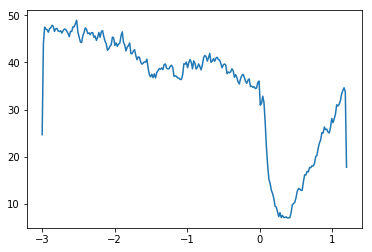

In [49]:
plt.plot(tt,fr[:,:,0].mean(axis=1))

In [267]:
embed_tt = embed_data['time']
embed_vecs = embed_data['embed']
embed_trials = embed_data['trial_id']

print(embed_vecs.shape)

(248, 375, 16)


In [51]:
tt

array([-3.   , -2.983, -2.966, -2.949, -2.932, -2.915, -2.898, -2.881,
       -2.864, -2.847, -2.83 , -2.813, -2.796, -2.779, -2.762, -2.745,
       -2.728, -2.711, -2.694, -2.677, -2.66 , -2.643, -2.626, -2.609,
       -2.592, -2.575, -2.558, -2.541, -2.524, -2.507, -2.49 , -2.473,
       -2.456, -2.439, -2.422, -2.405, -2.388, -2.371, -2.354, -2.337,
       -2.32 , -2.303, -2.286, -2.269, -2.252, -2.235, -2.218, -2.201,
       -2.184, -2.167, -2.15 , -2.133, -2.116, -2.099, -2.082, -2.065,
       -2.048, -2.031, -2.014, -1.997, -1.98 , -1.963, -1.946, -1.929,
       -1.912, -1.895, -1.878, -1.861, -1.844, -1.827, -1.81 , -1.793,
       -1.776, -1.759, -1.742, -1.725, -1.708, -1.691, -1.674, -1.657,
       -1.64 , -1.623, -1.606, -1.589, -1.572, -1.555, -1.538, -1.521,
       -1.504, -1.487, -1.47 , -1.453, -1.436, -1.419, -1.402, -1.385,
       -1.368, -1.351, -1.334, -1.317, -1.3  , -1.283, -1.266, -1.249,
       -1.232, -1.215, -1.198, -1.181, -1.164, -1.147, -1.13 , -1.113,
      

In [52]:
embed_tt

array([-2.9988, -2.9818, -2.9648, -2.9478, -2.9308, -2.9138, -2.8968,
       -2.8798, -2.8628, -2.8458, -2.8288, -2.8118, -2.7948, -2.7778,
       -2.7608, -2.7438, -2.7268, -2.7098, -2.6928, -2.6758, -2.6588,
       -2.6418, -2.6248, -2.6078, -2.5908, -2.5738, -2.5568, -2.5398,
       -2.5228, -2.5058, -2.4888, -2.4718, -2.4548, -2.4378, -2.4208,
       -2.4038, -2.3868, -2.3698, -2.3528, -2.3358, -2.3188, -2.3018,
       -2.2848, -2.2678, -2.2508, -2.2338, -2.2168, -2.1998, -2.1828,
       -2.1658, -2.1488, -2.1318, -2.1148, -2.0978, -2.0808, -2.0638,
       -2.0468, -2.0298, -2.0128, -1.9958, -1.9788, -1.9618, -1.9448,
       -1.9278, -1.9108, -1.8938, -1.8768, -1.8598, -1.8428, -1.8258,
       -1.8088, -1.7918, -1.7748, -1.7578, -1.7408, -1.7238, -1.7068,
       -1.6898, -1.6728, -1.6558, -1.6388, -1.6218, -1.6048, -1.5878,
       -1.5708, -1.5538, -1.5368, -1.5198, -1.5028, -1.4858, -1.4688,
       -1.4518, -1.4348, -1.4178, -1.4008, -1.3838, -1.3668, -1.3498,
       -1.3328, -1.3

In [268]:
find_closest = lambda x, x0: np.argmin(np.abs(x-x0))

starting_ind = find_closest(embed_tt, tt[0])
print(starting_ind)

0


In [294]:
def temporal_alignment_embed_and_ephys(ephys_tt,embed_tt, embed_vecs, fr, dt = 0.0034):
    if ephys_tt[0] < embed_tt[0]:
        embed_start_ind = 0
        ephys_start_ind = find_closest(ephys_tt, embed_tt[0] + dt/2)
    else: 
        embed_start_ind = find_closest(embed_tt, ephys_tt[0] - dt/2)
        ephys_start_ind = 0

    if ephys_tt[-1] > embed_tt[-1] + dt/2:
        embed_end_ind = len(embed_tt)
        ephys_end_ind = ephys_start_ind + embed_end_ind - embed_start_ind
    else:
        ephys_end_ind = len(ephys_tt)
        embed_end_ind = embed_start_ind + ephys_end_ind - ephys_start_ind

    joint_tt = ephys_tt[ephys_start_ind:ephys_end_ind]
    joint_embed_vecs = embed_vecs[embed_start_ind:embed_end_ind]
    joint_fr = fr[ephys_start_ind:ephys_end_ind]
    print(ephys_start_ind, ephys_end_ind, embed_start_ind, embed_end_ind)

    return joint_tt, joint_embed_vecs, joint_fr

In [286]:
def align_datasets(ephys_tt, embed_tt, embed_vecs, embed_trials, fr):
    starting_ind = find_closest(embed_tt, ephys_tt[0])
    length = min(len(ephys_tt), len(embed_tt))
    
    return fr[:length,...][:,embed_trials], embed_vecs[starting_ind:(starting_ind+length)]

fr_aligned, embed_aligned = align_datasets(tt, embed_tt, embed_vecs, embed_trials, fr)

print(fr_aligned.shape, embed_aligned.shape)

(248, 375, 512) (248, 375, 16)


In [295]:
joint_tt, joint_embed, joint_fr = temporal_alignment_embed_and_ephys(tt, embed_tt, embed_vecs, fr, dt = 0.0034)

print(joint_embed.shape, joint_fr.shape)

1 249 0 248
(248, 375, 16) (247, 561, 512)


In [296]:
fr[1:249].shape

(247, 561, 512)

In [300]:
embed_tt

array([-2.9988, -2.9818, -2.9648, -2.9478, -2.9308, -2.9138, -2.8968,
       -2.8798, -2.8628, -2.8458, -2.8288, -2.8118, -2.7948, -2.7778,
       -2.7608, -2.7438, -2.7268, -2.7098, -2.6928, -2.6758, -2.6588,
       -2.6418, -2.6248, -2.6078, -2.5908, -2.5738, -2.5568, -2.5398,
       -2.5228, -2.5058, -2.4888, -2.4718, -2.4548, -2.4378, -2.4208,
       -2.4038, -2.3868, -2.3698, -2.3528, -2.3358, -2.3188, -2.3018,
       -2.2848, -2.2678, -2.2508, -2.2338, -2.2168, -2.1998, -2.1828,
       -2.1658, -2.1488, -2.1318, -2.1148, -2.0978, -2.0808, -2.0638,
       -2.0468, -2.0298, -2.0128, -1.9958, -1.9788, -1.9618, -1.9448,
       -1.9278, -1.9108, -1.8938, -1.8768, -1.8598, -1.8428, -1.8258,
       -1.8088, -1.7918, -1.7748, -1.7578, -1.7408, -1.7238, -1.7068,
       -1.6898, -1.6728, -1.6558, -1.6388, -1.6218, -1.6048, -1.5878,
       -1.5708, -1.5538, -1.5368, -1.5198, -1.5028, -1.4858, -1.4688,
       -1.4518, -1.4348, -1.4178, -1.4008, -1.3838, -1.3668, -1.3498,
       -1.3328, -1.3

In [308]:
['asd']*10

['asd', 'asd', 'asd', 'asd', 'asd', 'asd', 'asd', 'asd', 'asd', 'asd']

In [55]:
def calc_r2_for_single_neuron(embed_over_time,fr_over_time,embed_window = 5):
    N_time, N_trials = fr_over_time.shape
    r2 = np.zeros(N_time)

    for t in range(N_time):
        fr_this_time = fr_over_time[t,:]

        embed_this_time = np.concatenate(embed_over_time[t-int(embed_window/2):t+int(embed_window/2),:,:],axis = 1)
        print(embed_this_time.shape)


from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score

def calculate_r2_for_each_timepoint(embed_over_time, fr_over_time, window_size):
    time, trials, n = embed_over_time.shape
    r2_scores = np.zeros((time,fr_over_time.shape[-1]))

    for t in range(time):
        # Define the window
        start = max(0, t - int(window_size/2 + 1) + 1)
        end = min(t + int(window_size/2 + 1),time)
        if t == 10:
            print(start,end)
        # Extract data for this window
        X = np.concatenate(embed_over_time[start:end], axis = 1) # Reshape to [trials, features]
        y = fr_over_time[t,:,:]  # Target firing rates at this timepoint

        # Fit RidgeCV model
        model = RidgeCV(alphas=np.logspace(-6, 6, 13), cv = 10)
        print(X.shape, y.shape)
        model.fit(X, y)

        # Predict and calculate R²
        y_pred = model.predict(X)
        r2_scores[t,:] = r2_score(y, y_pred,multioutput='raw_values')

    return r2_scores


#r2_scores = calculate_r2_for_each_timepoint(embed_aligned, fr_aligned, 5)

#plt.plot(tt,r2_scores)

In [307]:
ephys_data['trial_type'] * ephys_data['correctness']

array([ 0,  1,  1,  0,  1,  0,  0,  0,  0, -1,  1,  1,  1,  0,  0,  0,  0,
        0,  0,  0,  1,  1,  1,  0,  0,  0,  0,  1,  1,  0,  0,  1,  0,  1,
        1,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  1,  1,  0,
        1,  1,  1,  0,  1,  1,  1,  0,  0,  0,  1,  0,  1,  0,  0,  0,  1,
        0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  0,  0,  1,  0,  1,  1,  0,
        0,  1,  1,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,
        0,  1,  0,  1,  0,  1,  1,  0,  0,  1,  0, -1,  1,  1,  0,  1,  1,
        1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  1,
        0,  0,  1,  0,  1,  0,  0,  0,  1,  0,  1,  1,  1,  0,  1,  1,  0,
        0,  0,  1,  1,  0,  0,  0,  0,  1,  0,  0,  1,  0,  1,  0,  0,  0,
        0,  1,  0,  1,  0,  0,  0,  1,  0,  1,  1,  0,  1,  0,  1,  0,  0,
        1,  1,  1,  0,  0,  1,  1,  0,  1,  1,  0,  0,  0,  0,  0,  1,  1,
        0,  0,  1,  0,  1,  1,  1,  0,  1,  0,  1,  1,  0,  0,  1,  0,  0,
        0,  1,  0,  1,  1

In [ ]:
def create_4fold_trial_type_mask(ephys_data):
    '''
    Creates a mask for trial stratification for cross-validation.
    
    The groups are:
    1: Hit right
    2: Miss right
    3: Hit left
    4: Miss left
    
    '''
    trial_type = ephys_data['trial_type']
    correctness = ephys_data['correctness']
    mask = np.zeros_like(trial_type)
    mask[(trial_type == 0) * (correctness == 1)] = 1
    mask[(trial_type == 0) * (correctness == 0)] = 2
    mask[(trial_type == 1) * (correctness == 1)] = 3
    mask[(trial_type == 1) * (correctness == 0)] = 4
    return mask

In [278]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score

def custom_cross_val_score(model, X, y, trial_mask, cv=5):
    '''
    Custom cross validation for ridge regression that returns the R² scores and fold predictions.

    Parameters
    ----------
    model : sklearn.linear_model
        The model to use for fitting.
    X : np.ndarray
        The input data.
    y : np.ndarray
        The target data.
    trial_mask : np.ndarray
        The trial mask for stratification.
    cv : int, optional
        The number of folds. The default is 5.
    
    Returns
    -------
    r2_scores_per_fold : np.ndarray
        The R² scores for each fold.
    y_test_per_fold : np.ndarray
        The target data for each fold.
    y_pred_per_fold : np.ndarray
        The predicted data for each fold.
    test_masks : np.ndarray
        The trial masks for each fold.
    '''

    kf = StratifiedKFold(n_splits=cv)
    r2_scores_per_fold = []
    y_test_per_fold = []
    y_pred_per_fold = []
    test_masks = []

    for train_index, test_index in kf.split(X, trial_mask):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        mask_train, mask_test = trial_mask[train_index], trial_mask[test_index]
        test_masks.append(mask_test)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2_scores = r2_score(y_test, y_pred, multioutput='raw_values')

        r2_scores_per_fold.append(r2_scores)
        y_test_per_fold.append(y_test)
        y_pred_per_fold.append(y_pred)

    return np.array(r2_scores_per_fold).T, np.concatenate(y_test_per_fold, axis = 0), np.concatenate(y_pred_per_fold, axis = 0), np.concatenate(test_masks, axis = 0)

find_closest = lambda x, x0: np.argmin(np.abs(x-x0))

def temporal_alignment_embed_and_ephys(ephys_tt,embed_tt, embed_vecs, fr, dt = 0.0034):
    '''Align the embeding vectors and the firing rates in time.
    
    This assumes that the dt is the same for both datasets.

    Parameters
    ----------
    ephys_tt : np.ndarray
        The time stamps for the ephys data.
    embed_tt : np.ndarray
        The time stamps for the embedding vectors.
    embed_vecs : np.ndarray [time, trial, embedding_dim]
        The embedding vectors.
    fr : np.ndarray [time, trial, neuron]
        The firing rates.
    dt : float, optional
        The time step. The default is 0.0034.

    Returns
    -------
    joint_tt : np.ndarray
        The time stamps for the joint data.
    joint_embed_vecs : np.ndarray
        The embedding vectors aligned to the ephys data.
    joint_fr : np.ndarray
        The firing rates aligned to the embedding vectors.
    '''
    if ephys_tt[0] < embed_tt[0]:
        embed_start_ind = 0
        ephys_start_ind = find_closest(ephys_tt, embed_tt[0] + dt/2)
    else: 
        embed_start_ind = find_closest(embed_tt, ephys_tt[0] - dt/2)
        ephys_start_ind = 0

    if ephys_tt[-1] > embed_tt[-1] + dt/2:
        embed_end_ind = len(embed_tt)
        ephys_end_ind = ephys_start_ind + embed_end_ind - embed_start_ind
    else:
        ephys_end_ind = len(ephys_tt)
        embed_end_ind = embed_start_ind + ephys_end_ind - ephys_start_ind

    joint_tt = ephys_tt[ephys_start_ind:ephys_end_ind]
    joint_embed_vecs = embed_vecs[embed_start_ind:embed_end_ind]
    joint_fr = fr[ephys_start_ind:ephys_end_ind]
    print(ephys_start_ind, ephys_end_ind, embed_start_ind, embed_end_ind)

    return joint_tt, joint_embed_vecs, joint_fr

def get_regular_trial_mask(ephys_data):
    '''
    Returns a mask for regular trials.
    
    No early lick, no auto water, no free water, no no response trials.
    '''
    return (ephys_data['early_lick_trials'] == 0) \
         * (ephys_data['auto_water_trials'] == 0)  \
         * (ephys_data['free_water_trials'] == 0)  \
         * (ephys_data['correctness'] != -1)

aligned_embed_data_folder = '/oak/stanford/groups/shauld/kurgyis/data/Map_aligned_embed_vecs/'
save_folder = '/oak/stanford/groups/shauld/kurgyis/data/Map_r2_scores/'
preprocessed_ephys_data_folder = '/oak/stanford/groups/shauld/kurgyis/data/Map_ULTIMATE_preprocessed/stride3_bw40/'
preprocessed_ephys_data_subfolders = [f.path for f in os.scandir(preprocessed_ephys_data_folder) if f.is_dir()]
embed_files = get_file_paths(aligned_embed_data_folder)

window_size = 5
kfold = 5
timeshift = 0

# load the embed data
for embed_file in embed_files:
    print(embed_file)
    with open(embed_file, 'rb') as file:
        embed_data = pickle.load(file)

    embed_tt = embed_data['embed_time']
    embed_vecs = embed_data['embed']
    embed_trials = embed_data['trial_inds']

    session_string = embed_file.split('/')[-1].split('_aligned')[0]
    # we don't have double session on single day mice in the dataset yet, but will have to control for that
    session_ephys_folder = [f for f in preprocessed_ephys_data_subfolders if session_string in f][0]
    session_ephys_files = get_file_paths(session_ephys_folder)

    # load the ephys data
    fr_list = []
    ccf_labels = []
    ccf_coord_list = []
    for file in session_ephys_files:
        if file[-6:] != 'pickle':
            continue
        with open(file, 'rb') as f:
            ephys_data = pickle.load(f)
        fr_list.append(ephys_data['fr'])
        ccf_labels += ephys_data['ccf_label']
        ccf_coord_list.append(ephys_data['ccf_coordinate'])
        print(ephys_data.keys())

    ccf_coords = np.concatenate(ccf_coord_list, axis = 0)
    fr = np.concatenate(fr_list, axis=2)

    # small preprocessing before we can calculate r2
    joint_tt, embed_aligned, fr_aligned = temporal_alignment_embed_and_ephys(tt, embed_tt, embed_vecs, fr, dt = 0.0034)

    regular_trials = get_regular_trial_mask(ephys_data)[trial_inds]
    stratification_mask = create_4fold_trial_type_mask(ephys_data)[trial_inds]
    fr_over_time = fr_aligned[:,trial_inds,:][:,regular_trials,:]
    embed_over_time = embed_aligned[:,regular_trials,:]

    time, trials, n = embed_aligned.shape

    # calculate r2
    r2_scores = np.zeros((time,fr_over_time.shape[-1],kfold))
    y_test = np.zeros((fr_over_time.shape))
    y_pred = np.zeros((fr_over_time.shape))
    trial_type_masks = np.zeros((time,trials))

    for t in range(0,time):
        # Define the window
        start = max(0, t + timeshift - int(window_size/2 + 1) + 1)
        end = min(t + timeshift + int(window_size/2 + 1),time)

        # Extract data for this window
        X = np.concatenate(embed_over_time[start:end], axis = 1) # Reshape to [trials, features]
        y = fr_over_time[t,:,:]  # Target firing rates at this timepoint

        # Fit RidgeCV model
        model = RidgeCV(alphas=np.logspace(-6, 6, 13), cv = 10)

        # Predict and calculate R²
        r2_scores[t,:], y_test[t,:], y_pred[t], trial_type_masks[t,:] = \
            custom_cross_val_score(model, X, y, stratification_mask,cv=kfold)
        
    # save the results
    filename = 'r2_scores_%s_%d_%d_%d.pkl'%(session_string, window_size, kfold, timeshift)
    dict_to_save = {
        'window_size': window_size,
        'kfold': kfold,
        'timeshift': timeshift,
        'session_name': session_string,
        'r2_scores': r2_scores, 
        'y_test': y_test, 
        'y_pred': y_pred, 
        'trial_type_masks': trial_type_masks, 
        'ccf_coords': ccf_coords, 
        'ccf_labels': ccf_labels}
    
    with open(filename, 'wb') as file:
        pickle.dump(dict_to_save, save_folder + file)

8 13


In [279]:
y_test.shape

(375, 512)

(-1, 2)

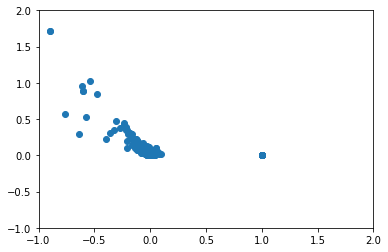

In [63]:
plt.plot(r2_scores[t].mean(axis = 1),r2_scores[t,:].std(axis = 1),'o')
r2_scores[t].shape
plt.ylim(-1,2)
plt.xlim(-1,2)

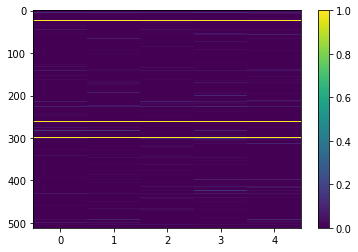

In [58]:
plt.imshow(r2_scores[t,:,:],aspect='auto',vmin=0,vmax=1)
plt.colorbar()

In [42]:
with open('score-neruon_r2.pickle', 'rb') as file:
    scores, neuron_r2 = pickle.load(file)


In [51]:
neuron_r2['SC026_080519-521-25000-a1-leftALM'][(('embed', 0, 5), 'entire', 'val-test')]

52

In [58]:
session_area_keys = list(neuron_r2.keys())
print(session_area_keys[0][:16])
session_ids = list(set([k[:16] for k in session_area_keys]))
print(len(session_ids),len(session_area_keys))
animal_ids = list(set([k[:5] for k in session_ids]))
print(len(animal_ids))

SC026_080519-521
106 589
21


In [61]:
scores['SC026_080519-521-25000-a1-leftALM']

{(('embed', 0, 1), 'entire', 'train'): 0.17569810568656224,
 (('embed', 0, 1), 'entire', 'train', 'uniform'): 0.08236556342528835,
 (('embed', 0, 1), 'entire', 'train', 'in_trial'): 0.12264631021425211,
 (('embed', 0, 1), 'entire', 'train', 'in_time'): -0.002755585783818876,
 (('embed', 0, 1), 'entire', 'val-test'): 0.15465185590264488,
 (('embed', 0, 1), 'entire', 'val-test', 'uniform'): 0.07139596434405081,
 (('embed', 0, 1), 'entire', 'val-test', 'in_trial'): 0.09892451926405114,
 (('embed', 0, 1), 'entire', 'val-test', 'in_time'): -0.024488229916875118,
 (('embed', 0, 1), 'entire', 'train', 'clip'): 0.08236556342542276,
 (('embed', 0, 1), 'entire', 'val-test', 'clip'): 0.07214113608503346,
 (('embed', 0, 1), 'sample+delay', 'train'): 0.1206794242512638,
 (('embed', 0, 1), 'sample+delay', 'train', 'uniform'): 0.0594402153386538,
 (('embed', 0, 1), 'sample+delay', 'train', 'in_trial'): 0.01849743551386036,
 (('embed', 0, 1), 'sample+delay', 'train', 'in_time'): 0.02464715869323604,
 

Look at individual session $r^2$ values

In [310]:
single_session_r2 = pickle.load(open('r2_scores_SC033_20191114_5_5_0.pkl', 'rb'))

print(single_session_r2.keys())

dict_keys(['window_size', 'kfold', 'timeshift', 'session_name', 'r2_scores', 'y_test', 'y_pred', 'tt', 'trial_type_masks', 'ccf_coords', 'ccf_labels'])


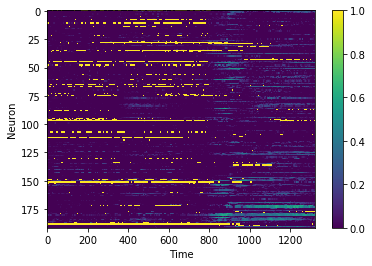

In [312]:
r2 = single_session_r2['r2_scores']
tt = single_session_r2['tt']

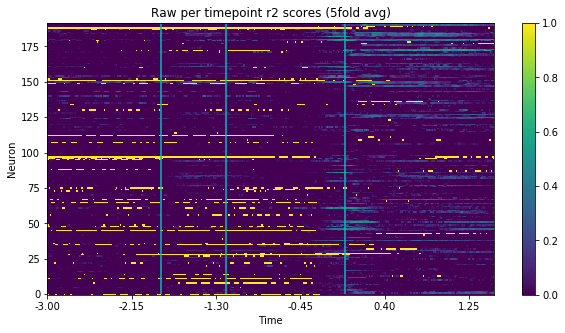

In [347]:
plt.figure(figsize=(10,5))
plt.imshow(r2.mean(axis = -1).T, aspect = 'auto', vmin = 0, vmax = 1)
plt.xlabel('Time')
plt.ylabel('Neuron')
plt.title('Raw per timepoint r2 scores (5fold avg)')
plt.xticks(np.arange(0,len(tt),250),['%.2f'%t for t in tt[::250]])
a,b = plt.ylim()
plt.vlines(np.argmin(np.abs(tt)),0,r2.shape[1],'c')
plt.vlines(np.argmin(np.abs(tt+1.2)),0,r2.shape[1],'c')
plt.vlines(np.argmin(np.abs(tt+1.85)),0,r2.shape[1],'c')
plt.ylim(b,a)
plt.colorbar()

plt.savefig('r2_score_heatmap_SC033_20191114.png')

In [334]:
import functions_for_r2 as func

In [335]:
sample_r2, delay_r2, response_r2, sample_r2_old, delay_r2_old, response_r2_old = func.process_single_session_r2_dict(single_session_r2)


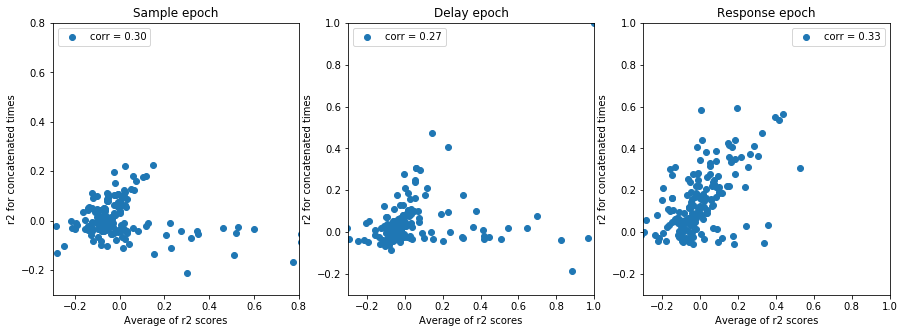

In [344]:
plt.subplots(1,3,figsize=(15,5))
plt.subplot(131)
plt.title('Sample epoch')
plt.plot(sample_r2,sample_r2_old,'o', label = 'corr = %.2f'%np.corrcoef(sample_r2,sample_r2_old)[0,1])
plt.xlabel('Average of r2 scores')
plt.ylabel('r2 for concatenated times')
plt.legend()
plt.xlim(-0.3,0.8)
plt.ylim(-0.3,0.8)

plt.subplot(132)
plt.title('Delay epoch')
plt.plot(delay_r2,delay_r2_old,'o', label = 'corr = %.2f'%np.corrcoef(delay_r2,delay_r2_old)[0,1])
plt.xlabel('Average of r2 scores')
plt.ylabel('r2 for concatenated times')
plt.legend()
plt.xlim(-0.3,1)
plt.ylim(-0.3,1)

plt.subplot(133)
plt.title('Response epoch')
plt.plot(response_r2,response_r2_old,'o', label = 'corr = %.2f'%np.corrcoef(response_r2,response_r2_old)[0,1])
plt.xlabel('Average of r2 scores')
plt.ylabel('r2 for concatenated times')
plt.legend()
plt.xlim(-0.3,1)
plt.ylim(-0.3,1)

plt.savefig('r2_old_and_new_methods_comparison_SC033_20191114.png')

In [348]:
fr = single_session_r2['y_test']

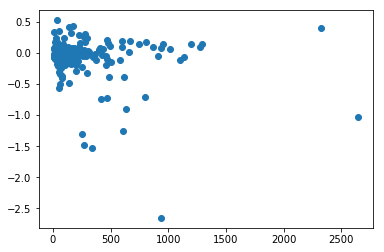

In [349]:
trial_by_trial_variance = fr.var(axis = 1).mean(axis = 0)


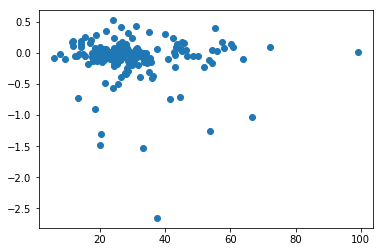

In [351]:
plt.plot(trial_by_trial_variance / fr.mean(axis = (0,1)),response_r2,'o')

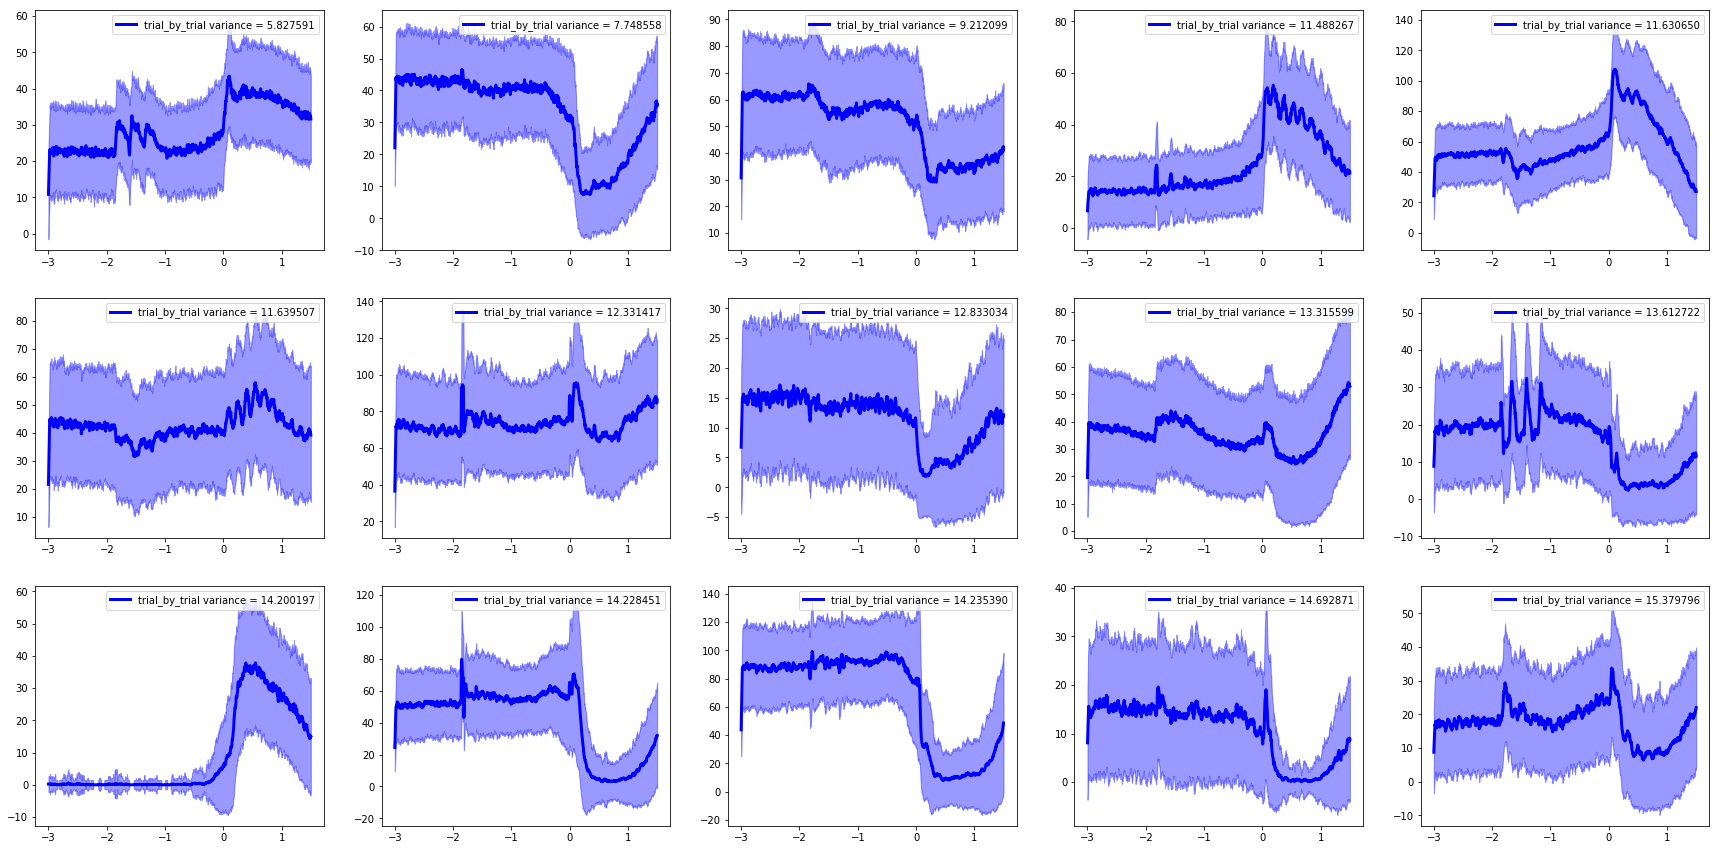

In [368]:
inds = np.argsort(trial_by_trial_variance / fr.mean(axis = (0,1)))
var = trial_by_trial_variance / fr.mean(axis = (0,1))
plt.subplots(3,5,figsize=(30,15))  
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.plot(tt,fr[:,:,inds[i]].mean(axis = 1), 'b-', lw = 3, label = 'trial_by_trial variance = %2f'%var[inds[i]])
    plt.legend()
    plt.fill_between(tt,fr[:,:,inds[i]].mean(axis = 1) - fr[:,:,inds[i]].std(axis = 1),fr[:,:,inds[i]].mean(axis = 1) + fr[:,:,inds[i]].std(axis = 1), alpha = 0.4, color = 'b')

(-0.3, 1)

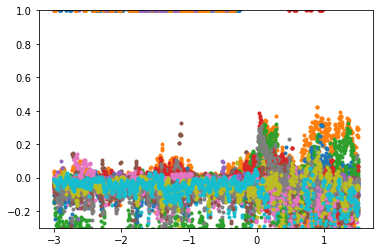

In [377]:
plt.plot(tt,r2.mean(axis = -1)[:,:20],'.');

plt.ylim(-0.3,1)

In [1]:
a = 'asdasd'
a[:-1]

'asdas'